# Zuber Data Analysis

## EDA - Top Ten Dropoff Neighborhoods

In [1]:
import pandas as pd
company_data = pd.read_csv('/datasets/project_sql_result_01.csv')
company_data.info()
company_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


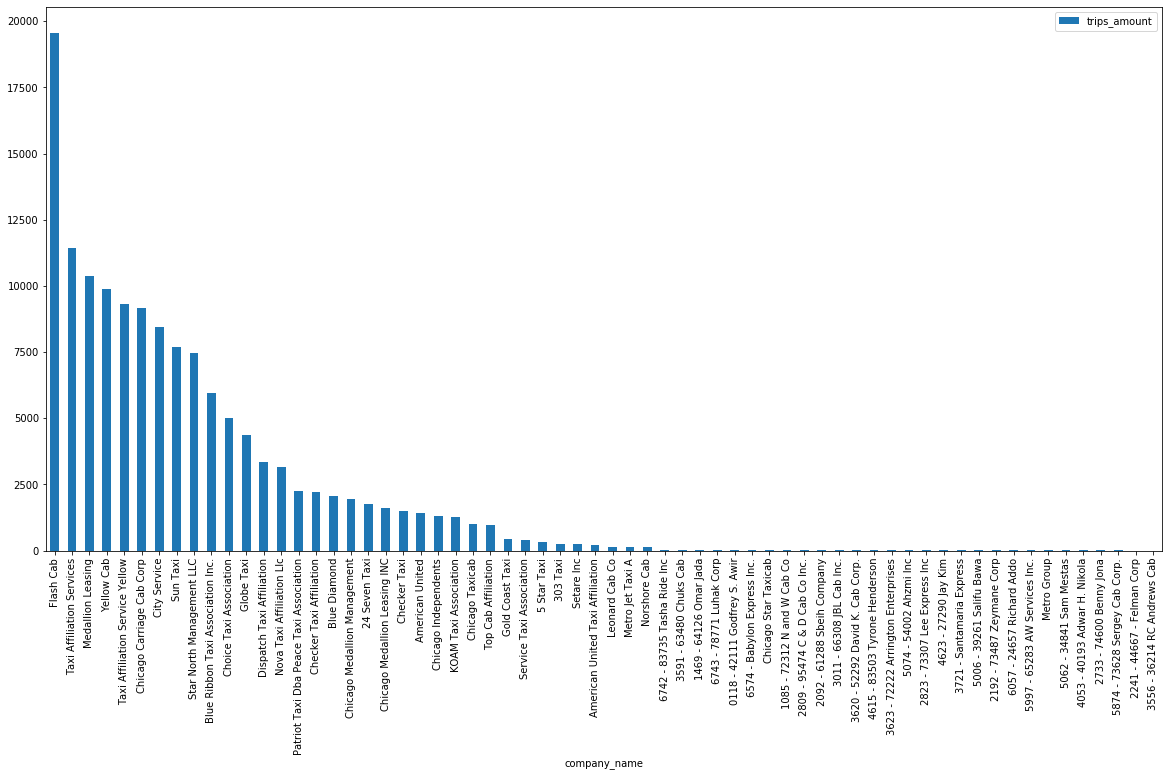

In [2]:
import numpy as np
import matplotlib.pyplot as plt
company_data.plot(x='company_name', kind='bar', figsize=(20,10))

This graph shows that only 14 of 63 of the taxi companys are doing 2500 rides in a typical 48 hr period. there are alot of very small single digit companys. These are probaly taxi cabs that are owner operated and only operate one cab at a time. Flash Cab is the clear leader in the market at 19558 rides in this period. This means that Flash cab may operate primarily in a high volume market such at loop which is considered downtown.

In [3]:
trip_data = pd.read_csv('/datasets/project_sql_result_04.csv')
trip_data.info()
trip_data.sort_values('average_trips', ascending=False).head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


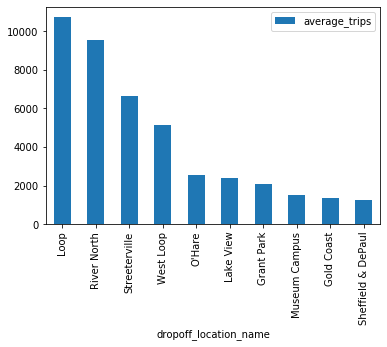

In [4]:
trip_data.sort_values('average_trips', ascending=False).head(10).plot(x='dropoff_location_name', kind='bar')

This shows that loop, river north, streeterville and west loop are considerable higher in volume than the other nrighborhhod in the top ten for dropoffs. These metropolitan areas have alot commuters living and going to work. 

## Testing Hypothesis

In [5]:
loop_to_ohare = pd.read_csv('/datasets/project_sql_result_07.csv')
good_loop_to_ohare = loop_to_ohare.query('weather_conditions == "Good" & duration_seconds > 0')
bad_loop_to_ohare = loop_to_ohare.query('weather_conditions == "Bad" & duration_seconds > 0')
print('Good weather variance:', good_loop_to_ohare['duration_seconds'].var())
print('Bad weather variance:', bad_loop_to_ohare['duration_seconds'].var())

Good weather variance: 552889.2319951818
Bad weather variance: 520294.086002483


In [6]:
from scipy import stats as st
alpha = .05 
results = st.ttest_ind(good_loop_to_ohare['duration_seconds'], bad_loop_to_ohare['duration_seconds'], equal_var=True)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("There is likley a difference in ride duration on rainy days")
else:
        print("There may not be a difference in ride duration on rainy days")

p-value:  1.3318772977743245e-11
There is likley a difference in ride duration on rainy days


For the hypothesis I broke the data into two serperate populations based on weather conditions. I formulated my null hypothesis that there is no significant difference in ride duration on rainy days. after testing the equality of the two population means i found that the pvalue was low enough to rejuct my null hypothesis and that there is a difference betwwen ride duration on rainy days from loop to ohare. This is probably due to traffic slowing down on the route from the loop area to the airport. The route will most likeley use the interstate and traffic slows down when it rains due to low visibillity and road hazards.